In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [66]:
#Code a nearest neighbor algorithm that works for two-dimensional data. 
#You can use either arrays or DataFrames to do this.

#Test it against the scikit-learn package on the music dataset from above to ensure that it's correct. 
#The goal here is to confirm your understanding of the model and continue to practice your Python skills.
#You can expect a brute force method here. After doing this,
#look up "ball tree" methods to see a more performant algorithm design.

In [43]:
game=pd.DataFrame()
# First Feature
game['weather']=[1,1,2,0,0,0,2,1,1,0,1,2,2,0]
# Second Feature
game['temp']=[36,38,40,25,10,15,8,27,11,20,27,23,38,19]

# Label or target varible
game['play']=[0,0,1,1,1,0,1,0,1,1,1,1,1,0]

In [50]:
game.head(3)

,weather,temp,play
0,1,36,0
1,1,38,0
2,2,40,1


In [45]:
X=game[['weather','temp']]
Y=game['play']

In [46]:
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [51]:
music = pd.DataFrame()

# Some data to play with
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# You know whether the songs in the training data are jazz or not
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
X = music[['loudness', 'duration']]
Y = music.jazz
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

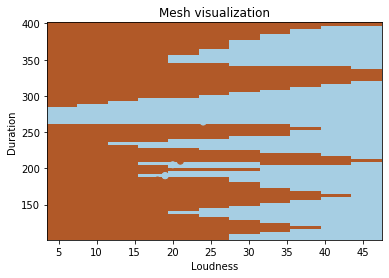

In [53]:
# The data. Converting from DataFrames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 4.0

# Plot the decision boundary and assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [55]:
from sklearn.neighbors import BallTree
tree = BallTree(X, leaf_size=2)  

In [64]:
tree.query(X, k=2, return_distance=False)  

array([[ 0, 26],
       [ 1,  4],
       [ 2, 24],
       [ 3, 25],
       [ 4, 11],
       [ 5, 17],
       [ 6, 12],
       [ 7, 28],
       [ 8, 11],
       [ 9, 23],
       [10, 18],
       [11,  8],
       [12,  6],
       [13, 29],
       [14, 27],
       [15, 20],
       [16, 25],
       [17,  5],
       [18, 10],
       [19, 27],
       [20, 15],
       [21, 10],
       [22,  5],
       [23,  9],
       [24,  2],
       [16, 25],
       [26,  0],
       [27, 14],
       [28,  7],
       [29, 13]])